<a href="https://colab.research.google.com/github/BrianKowalski/briankowalski/blob/main/tom_and_jerry_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade --quiet
!pip install seaborn
!pip install tensorflow

In [2]:
import opendatasets as ods
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
download_url = 'https://www.kaggle.com/datasets/vijayjoyz/tom-jerry-detection'
ods.download(download_url)

100%|██████████| 47.3M/47.3M [00:00<00:00, 77.4MB/s]


In [4]:
train = tf.keras.utils.image_dataset_from_directory(
    directory='tom-jerry-detection/train/train/',
    labels='inferred',
    validation_split=0.2,
    subset="training",
    seed=12345
)

Found 298 files belonging to 5 classes.
Using 239 files for training.


In [6]:
valid = tf.keras.utils.image_dataset_from_directory(
    directory='tom-jerry-detection/train/train/',
    labels='inferred',
    validation_split=0.2,
    subset="validation",
    seed=12345
)

Found 298 files belonging to 5 classes.
Using 59 files for validation.


In [8]:
test = tf.keras.utils.image_dataset_from_directory(
    directory='tom-jerry-detection/test/',
    seed=12345
)

Found 186 files belonging to 1 classes.


In [10]:
train.class_names

['angry', 'happy', 'sad', 'surprised', 'unknown']

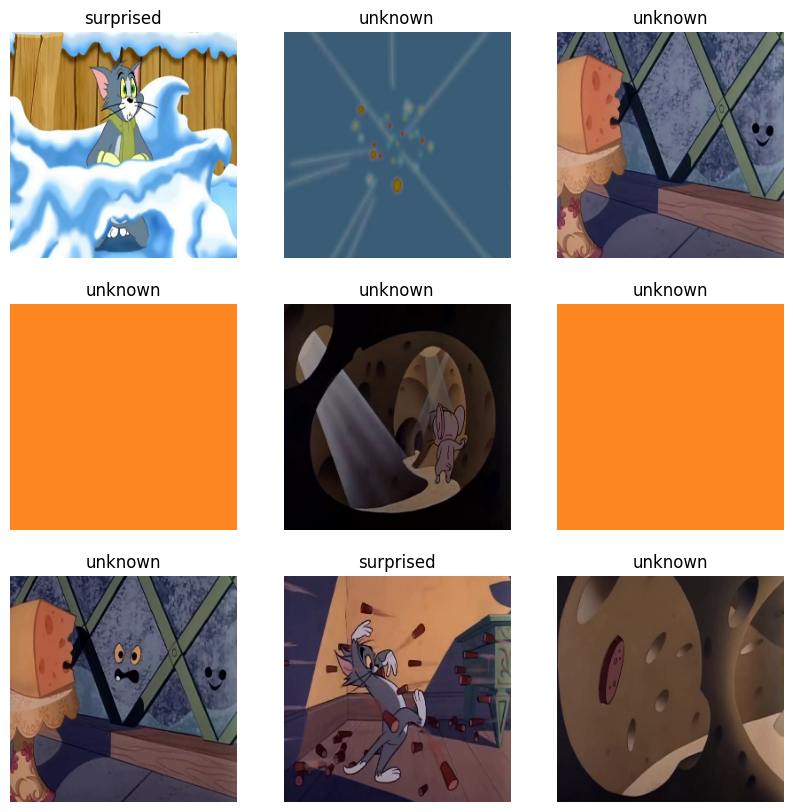

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train.class_names[labels[i]])
    plt.axis("off")